# Introduction


In this homework, you'll be required to load in a dataset which has about 500 features. By using
Lasso ($L^1$) regression, we'll find the optimal constraint on the $L^1$ norm which gives us the best
$R^2$. Then we'll plot the results.

Recall we minimize the following on ** training data: $(x_i,y_i)$**

$$\min_{\beta} \frac{1}{N} \sum_{i=1}^N (y_i - \beta \cdot x_i)^2 + \lambda \|\beta \|_{L^1}.$$


Denoting $\beta_{\lambda}$ as the minimum of the above, we then choose $\lambda$ to maximize $R^2$ on **testing data: $(x_j,y_j)$**

$$ \max_{\lambda} 1 - \frac{\sum_{j} (y_j - \beta_{\lambda} \cdot x_j)^2}{\sum_j (y_j - \bar y)^2}$$


# Lasso Regularization

## Problem 1

a) Load in hw2data.csv from ../data into a pandas dataframe.

In [36]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [37]:
df = pd.read_csv('https://raw.githubusercontent.com/Columbia-Intro-Data-Science/APMAE4990-/master/data/hw2data.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,y
0,0.382732,-0.034242,1.096347,-0.234216,-0.347451,-0.581268,-1.632635,-1.567768,-1.179158,1.301428,...,0.178793,-0.799422,0.240788,0.289121,0.412871,-0.198399,0.094192,-1.147611,-0.358114,-2.663126
1,0.555963,0.892474,-0.422315,0.104714,0.228053,0.201480,0.540774,-1.818078,-0.049324,0.239034,...,-0.740137,-0.565498,0.476031,-2.158069,1.318551,-0.239297,-0.246794,-1.079343,-0.114226,10.399650
2,0.013240,-0.121945,0.339059,-0.589632,-0.895816,0.548328,0.098667,0.197181,1.059027,-1.022564,...,-0.739936,1.315138,-0.323457,0.197828,0.097751,1.401523,0.158434,-1.141901,-1.310970,-21.762801
3,-1.532921,-1.711970,0.046135,-0.958374,-0.080812,-0.703859,-0.770784,-0.480845,0.703586,0.929145,...,0.473488,1.855246,1.415656,-0.302746,0.989679,0.585851,1.136388,0.671617,-0.974167,2.139453
4,-1.619685,0.572627,1.902618,-0.775664,-0.188090,-1.035748,1.177830,-2.305167,-2.263660,0.375020,...,-1.303220,0.466751,0.161106,0.320032,2.079177,-0.907466,-0.192404,-1.212516,-0.080599,0.194017


b) Set y to be the y variable in the dataframe from a and X to be the remaining features.

In [38]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

c) As shown in the Booking.com example, using Lasso regression, find the regularization strength
which optimizes the $R^2$. 

**Hint:** Take a range of alpha from `np.logspace(-8,-3,1000)`

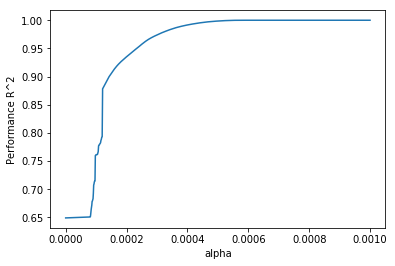

Regularization strength which optimizes the R^2: 0.000700
Training score: 0.999999
Test score: 0.999995


In [54]:
scaler = preprocessing.StandardScaler()
X = X.as_matrix().astype(np.float)
X = scaler.fit_transform(X)

# split data into training and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=123)

# initialization
alphas = np.logspace(-8,-3, 1000)
train_errors = []
test_errors = []

# iterate through alphas and append errors
for alpha in alphas:
    regr = Lasso(alpha = alpha, max_iter = 1500)
    regr.fit(X_train, y_train)
    train_errors.append(regr.score(X_train,y_train))
    test_errors.append(regr.score(X_test,y_test))
    
plt.plot(alphas,test_errors)  
plt.xlabel('alpha')
plt.ylabel('Performance R^2')
plt.show()

alpha_optim = alphas[np.argmax(test_errors)]
print("Regularization strength which optimizes the R^2: {:.6f}".format(alpha_optim))
print("Training score: {:.6f}".format(regr.score(X_train, y_train)))
print("Test score: {:.6f}".format(regr.score(X_test, y_test)))

d) Plot the training perforamnce versus the testing performance, and observe where the test performance is
maximized. I've written an outline of the code you need.

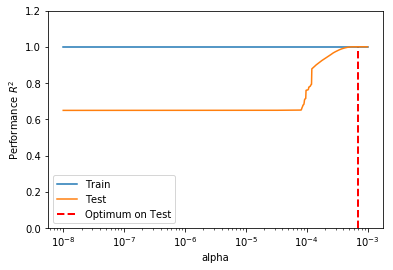

In [90]:
plt.semilogx(alphas, train_errors, label='Train')
plt.semilogx(alphas, test_errors, label='Test')
plt.vlines(alpha_optim, 0, np.max(test_errors),
           color='r', linestyle='--', linewidth=2, label='Optimum on Test')
plt.legend(loc='lower left')
plt.ylim([0, 1.2])
plt.xlabel('alpha')
plt.ylabel('Performance $R^2$')
plt.show()

e) Plot the top coefficients based on this optimal paramter. Why do you think so many are zero? 

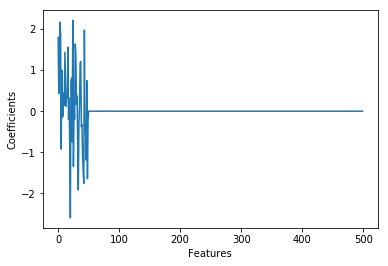

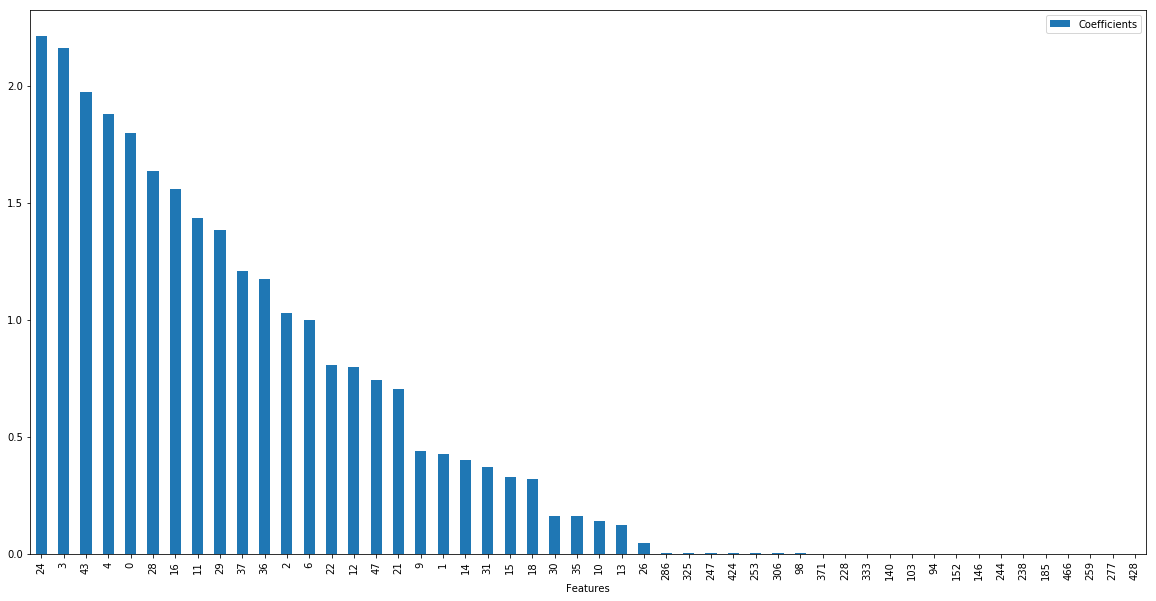

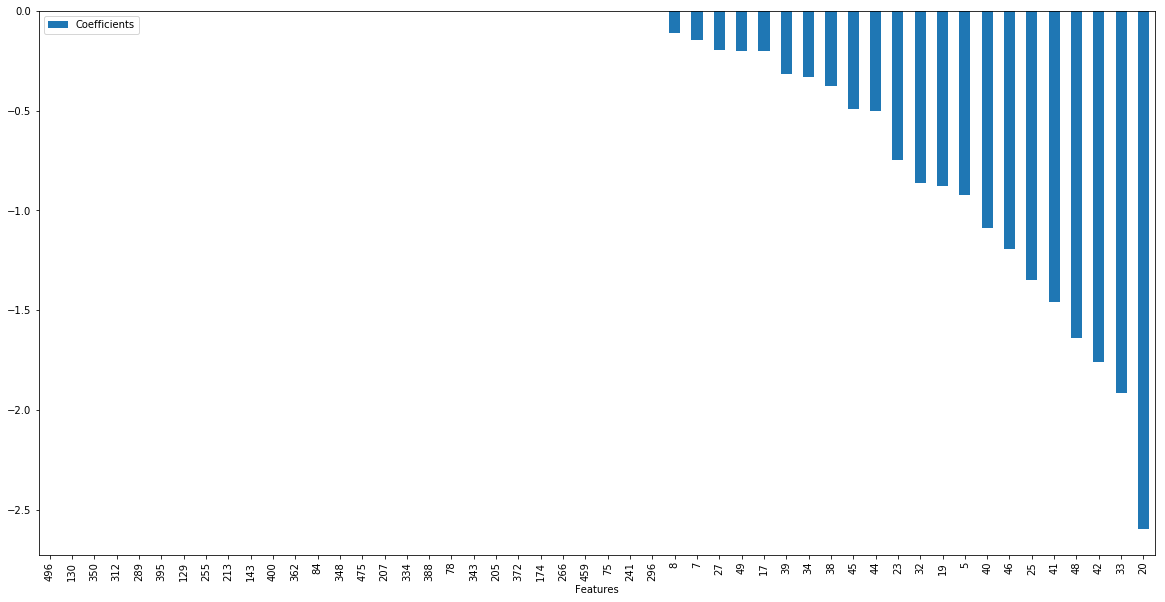

In [89]:
regr.set_params(alpha = alpha_optim)
coef = regr.fit(X_train, y_train).coef_
plt.plot(coef)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.show()

coef = pd.DataFrame({'Features': range(len(coef)), 'Coefficients': coef})
coef_sorted = coef.sort_values('Coefficients', ascending=False)[:50]
coef_sorted.plot(x='Features', y='Coefficients', kind='bar', figsize=(20,10))
coef_sorted = coef.sort_values('Coefficients', ascending=False)[-50:]
coef_sorted.plot(x='Features', y='Coefficients', kind='bar', figsize=(20,10))

There are a lot of zero coefficients because we are using the LASSO regression, which would penalize small coefficients to be zero. For the LASSO, the level sets for the constraint are boxes, and the tangent to the corner of the box has multiple values, which means that when we maximize the objective function value, the max will tend towards the axis. Thus, a lot of coefficients will tend towards zero for 500 dimensions as we tend towards a corner.

f) Compute the $R^2$ with the optimal coefficient found above on 5 folds using cross_val_score and plot the
results. Does the model work well on all random subsets?

[ 0.9999898   0.99999799  0.99999778  0.9999961   0.99999317]


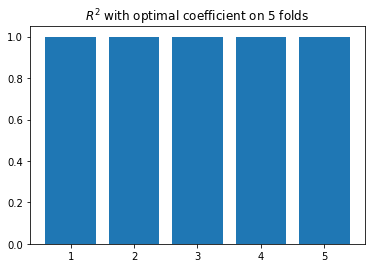

In [91]:
scores = cross_val_score(regr, X, y, cv=5)
print (scores)

plt.bar(range(1,6),scores)
plt.title('$R^2$ with optimal coefficient on 5 folds')
plt.show()

Yes, the model works well on all random subsets because $R^2$ is very close to 1.

f) Repeat e) but using cross validation. Use error bars on the features which are the standard deviation of the 
coefficiens obtained above. For this problem I"ll walk you through the code. You just need to apply your optimal
$\alpha$ found above. 

In [42]:
from sklearn.cross_validation import KFold
from sklearn import preprocessing
def run_cv_coeffs(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    kf = KFold(len(y),n_folds=5,shuffle=True)
    y_pred = y.copy()
    coeffs=[]
    # Iterate through folds
    for train_index, test_index in kf:
        
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        # Initialize a classifier with key word arguments
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
        coeffs.append(clf.coef_)
    return coeffs

scaler = preprocessing.StandardScaler()
X_scaled = X.as_matrix().astype(np.float)
X_scaled = scaler.fit_transform(X)

coeffs=run_cv_coeffs(X_scaled,np.array(y),Lasso,alpha=alpha_optim)

C:\Users\Yiyi.Zhang\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [43]:
def get_coeffs(coeffs):
    coeffs_avgd = [(coeffs[0][i] + coeffs[1][i] + coeffs[2][i] + coeffs[3][i] + coeffs[4][i])/5 for i in range(0,len(X.columns))]
    coeffs_std = [np.std([coeffs[0][i],coeffs[1][i],coeffs[2][i],coeffs[3][i],coeffs[4][i]]) for i in range(0,len(X.columns))]
    return coeffs_avgd, coeffs_std
coeffs_avg,coeffs_std=get_coeffs(coeffs)

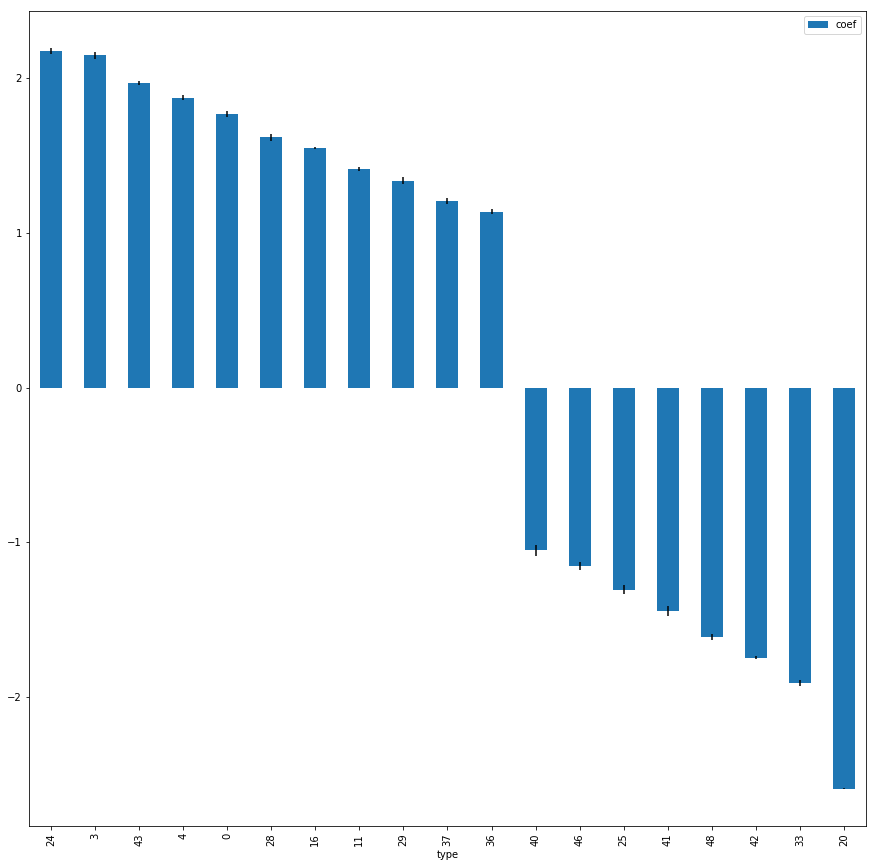

In [45]:
dfCoeffs = pd.DataFrame({'type':X.columns.values, 'coef':coeffs_avg, 'std':coeffs_std})
dfCoeffs = dfCoeffs[(dfCoeffs['coef']>1) |(dfCoeffs['coef']<-1) ]
plt.figure(figsize=(15,15))
dfCoeffs_sorted = dfCoeffs.sort_values(['coef'])[::-1]
yerr_vals = dfCoeffs_sorted['std'].values
dfCoeffs_sorted.plot(x='type',y='coef',kind='bar',yerr=yerr_vals,figsize=(15,15))